# Kelompok 1 PBL

1. Putra Nindya Yuwana (22)
2. Muhammad Ainur Riziq (19)
3. Hanifah Amany (16)
4. Mumahhmad Dayutirta Mahara (20)
5. Alifia Bilqi Firajulkha (2)

## UTS Machine Learning

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

## Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
  - Merubah color space
  - Reduksi dimensi
  - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


### Open Challange (Opsional)

Bagaimana cara melakukan evaluasi pada hasil segmentasi?

Terapkan pada kasus ini!


### Catatan:

Proses loading citra dicontohkan dengan menggunakan library openCV

Secara default, openCV akan memuat citra dalam format BGR

## UTS

### Import Library

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Load Gambar yang Digunakan

In [22]:
# Load Gambar
image_paths = ['plat (1).jpg', 'plat (2).jpeg', 'plat (3).jpeg', 'plat (4).jpeg', 'plat (5).jpeg']

### Membuat Fungsi untuk Menampilkan Perbandingan Gambar Asli dan Tersegmentasi

In [23]:
# Fungsi untuk Menampilkan Perbandingan Hasil
def show_comparison(original, recolored, title):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(recolored)
    ax[1].set_title(title, size=16)
    plt.show()

### Membuat Fungsi untuk Memvisualisasikan Distribusi Piksel berdasarkan Nilai Warnanya dalam Gambar RGB

In [26]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

### Melakukan Iterasi dengan Menerapkan K-Means untuk Segmentasi Warna

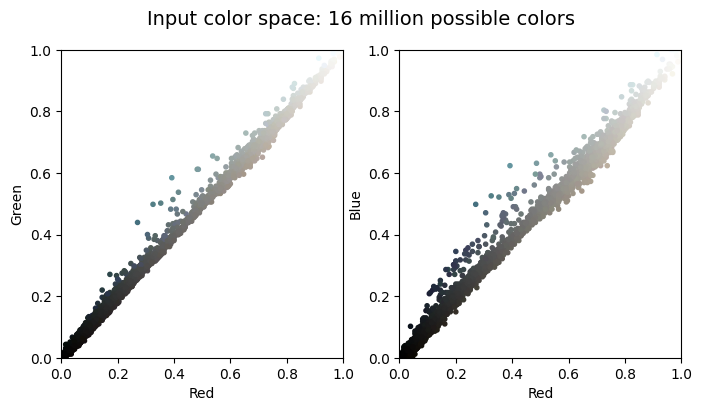

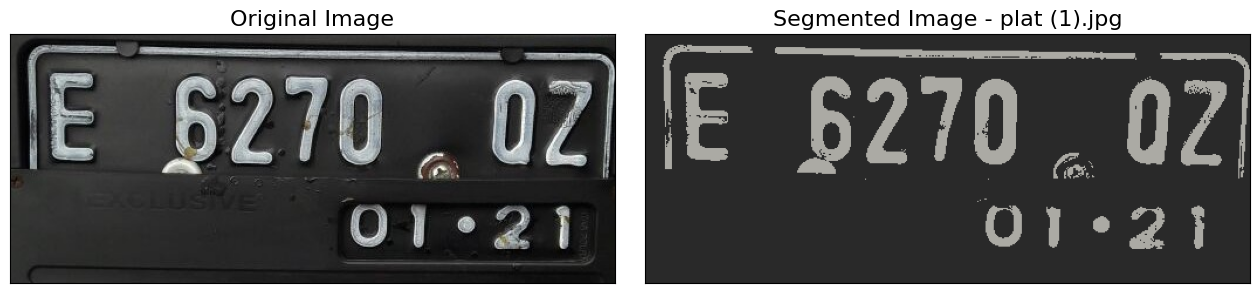

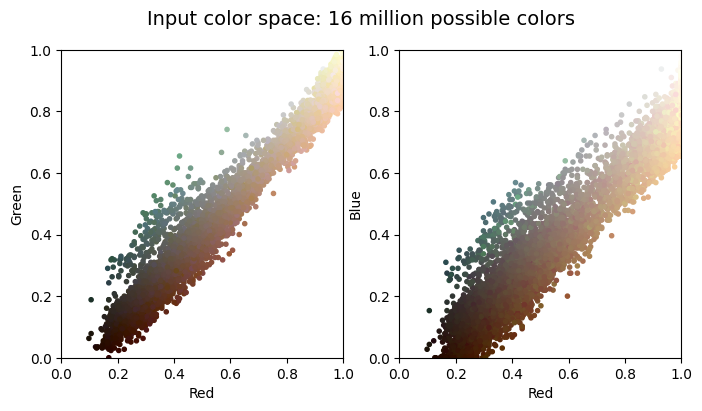

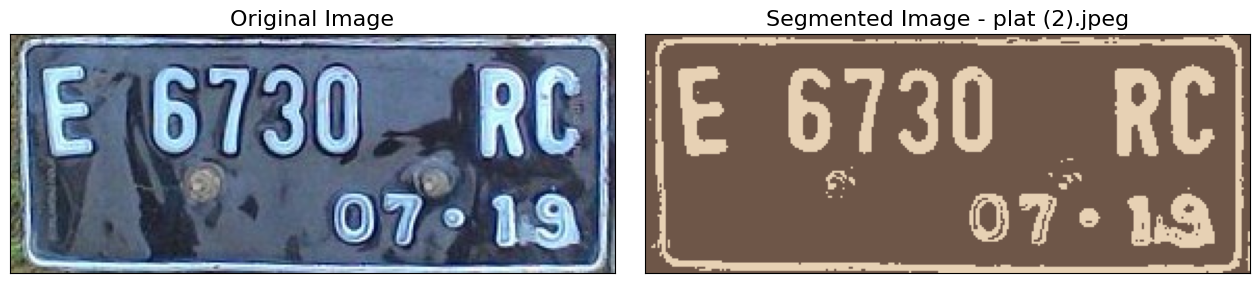

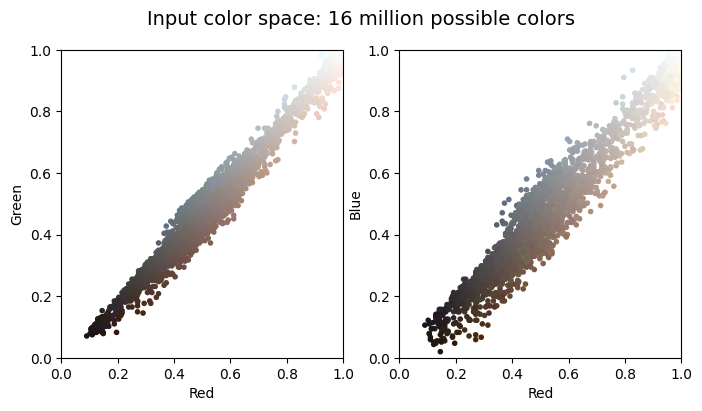

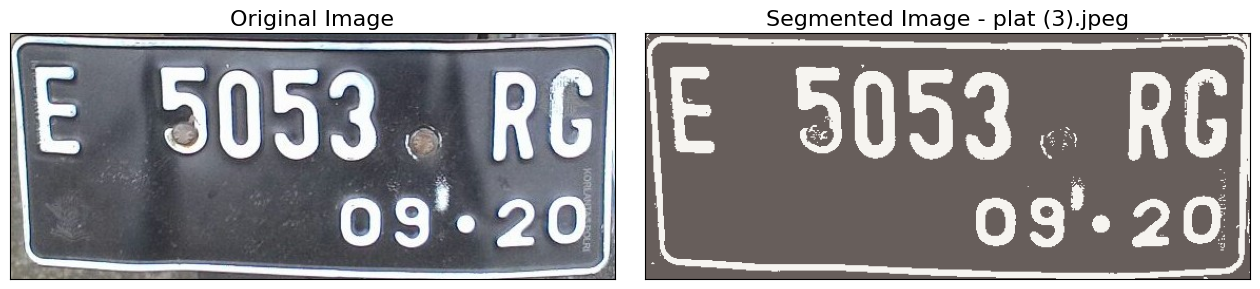

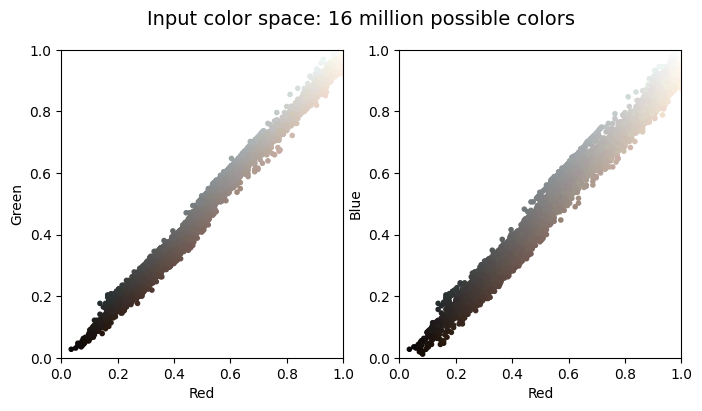

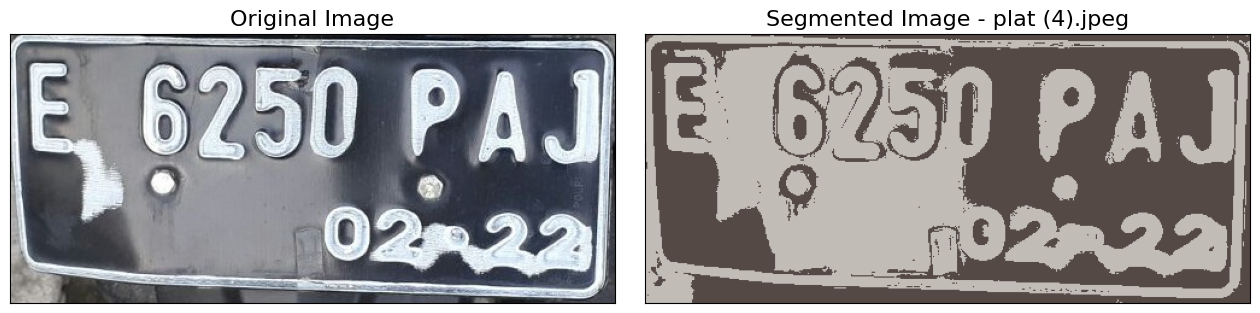

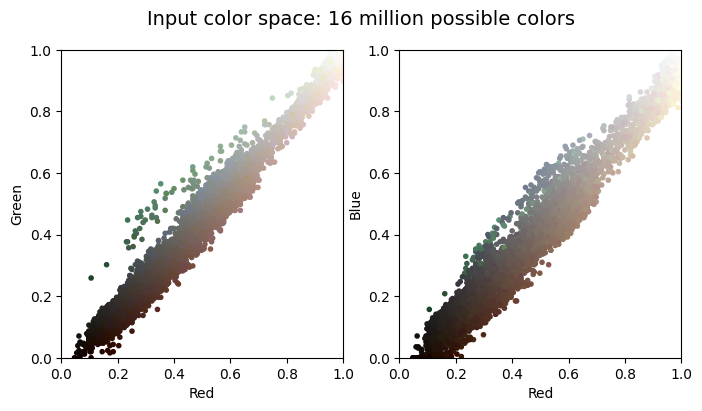

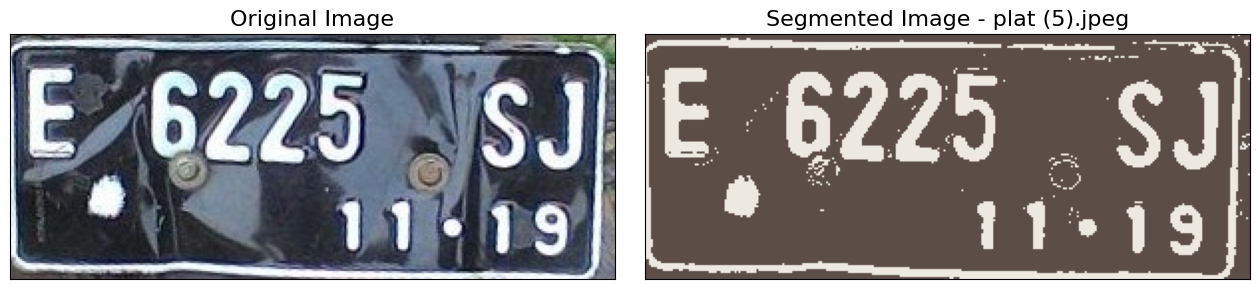

In [29]:
# Iterasi melalui setiap gambar plat nomor
for path in image_paths:
    # Baca gambar
    img = cv2.imread(path)

    if img is None:
        print(f"Gagal memuat gambar: {path}")
        continue

    # Ambil tinggi, lebar, dan channel
    h, w, ch = img.shape

    # Ubah data gambar ke range [0,1] untuk segmentasi
    data = img / 255.0
    data = data.reshape(h * w, ch)
    data.shape

    plot_pixels(data, title='Input color space: 16 million possible colors')

    # Terapkan K-Means untuk segmentasi warna
    n_colors = 2  # Jumlah klaster
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    img_recolored = new_colors.reshape(img.shape)

    # Tampilkan perbandingan sebelum dan sesudah segmentasi
    show_comparison(img, img_recolored, f'Segmented Image - {path}')

## Challenge

### Evaluasi dengan Metode Cluster Compactness dan Separation

- Within-Cluster Sum of Squares (WCSS): Mengukur seberapa dekat piksel dalam klaster dengan pusat klasternya; semakin rendah nilainya, semakin baik klaster terbentuk.

- Silhouette Score: Mengukur jarak antara klaster yang terbentuk, memberikan nilai antara -1 hingga 1; semakin tinggi nilainya, semakin jelas pemisahan antar klaster.

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def evaluate_segmentation(data, n_colors=2):
    # Terapkan K-Means
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(data)

    # Hitung WCSS
    wcss = kmeans.inertia_

    # Hitung Silhouette Score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)

    return wcss, silhouette_avg

# Evaluasi setiap gambar
for path in image_paths:
    img = cv2.imread(path)

    if img is None:
        print(f"Gagal memuat gambar: {path}")
        continue

    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)

    wcss, silhouette_avg = evaluate_segmentation(data, n_colors=2)

    print(f'Hasil evaluasi untuk {path}:')
    print(f' - Within-Cluster Sum of Squares (WCSS): {wcss}')
    print(f' - Silhouette Score: {silhouette_avg:.4f}')
    print()


Hasil evaluasi untuk plat (1).jpg:
 - Within-Cluster Sum of Squares (WCSS): 2042.7920003144216
 - Silhouette Score: 0.8155

Hasil evaluasi untuk plat (2).jpeg:
 - Within-Cluster Sum of Squares (WCSS): 1272.8412171765933
 - Silhouette Score: 0.6973

Hasil evaluasi untuk plat (3).jpeg:
 - Within-Cluster Sum of Squares (WCSS): 3716.660462723872
 - Silhouette Score: 0.8023

Hasil evaluasi untuk plat (4).jpeg:
 - Within-Cluster Sum of Squares (WCSS): 6191.160282913415
 - Silhouette Score: 0.6235

Hasil evaluasi untuk plat (5).jpeg:
 - Within-Cluster Sum of Squares (WCSS): 2275.492353715025
 - Silhouette Score: 0.6929

